# Wine Project
- Joey Gideon
- Andrew Casey

# Imports:

In [1]:
import pandas as pd
import numpy as np


from sklearn.cluster import KMeans
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import acquire as a
import prepare as p
import wrangle as w
import explore as exp
import evaluate as eva
import pretty as muah
import knear as k

import warnings
warnings.filterwarnings("ignore")

# Data Dictionary:

| Feature                | Data Type | Description                                       |
|------------------------|-----------|---------------------------------------------------|
| fixed_acidity          | float     | Fixed acidity level of the wine $(g/dm^3)$        |
| volatile_acidity       | float     | Volatile acidity level of the wine $(g/dm^3)$     |
| citric_acid            | float     | Citric acid content of the wine $(g/dm^3)$        |
| residual_sugar         | float     | Residual sugar content of the wine $(g/dm^3)$     |
| chlorides              | float     | Chloride content of the wine $(g/dm^3)$           |
| free_sulfur_dioxide    | float     | Free sulfur dioxide content of the wine $(mg/L)$  |
| total_sulfur_dioxide   | float     | Total sulfur dioxide content of the wine $(mg/L)$ |
| density                | float     | Density of the wine $(g/cm^3)$                    |
| pH                     | float     | pH value of the wine                              |
| sulphates              | float     | Sulphate content of the wine $(g/dm^3)$           |
| alcohol                | float     | Alcohol content of the wine (% vol)               |
| bound_sulfur_dioxide   | float     | Bound sulfur dioxide content of the wine $(mg/L)$ |
| White                  | int       | Wine type: 1 for white wine, 0 for red wine       |
| alcohol_sugar_density  | int       | Cluster of alcohol_sugar_density                  |
| quality                | int       | Subjective human taste test rating                |

# Acquire:

In [2]:
df = a.get_wine()
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,Type,White,bound_sulfur_dioxide
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White,1,125.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White,1,118.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White,1,67.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,1,139.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,1,139.0


# Prepare


- DataFrame has 6497 rows
- There are no null values
- There are 13 features with 1 created in acquire (Bound Sulfur Dioxide)

#### Outlier removal
- Outliers were removed based on Interquartile range
    - upper_bound = Q3 + (1.5 * IQR)
    - lower_bound = Q1 - (1.5 * IQR)

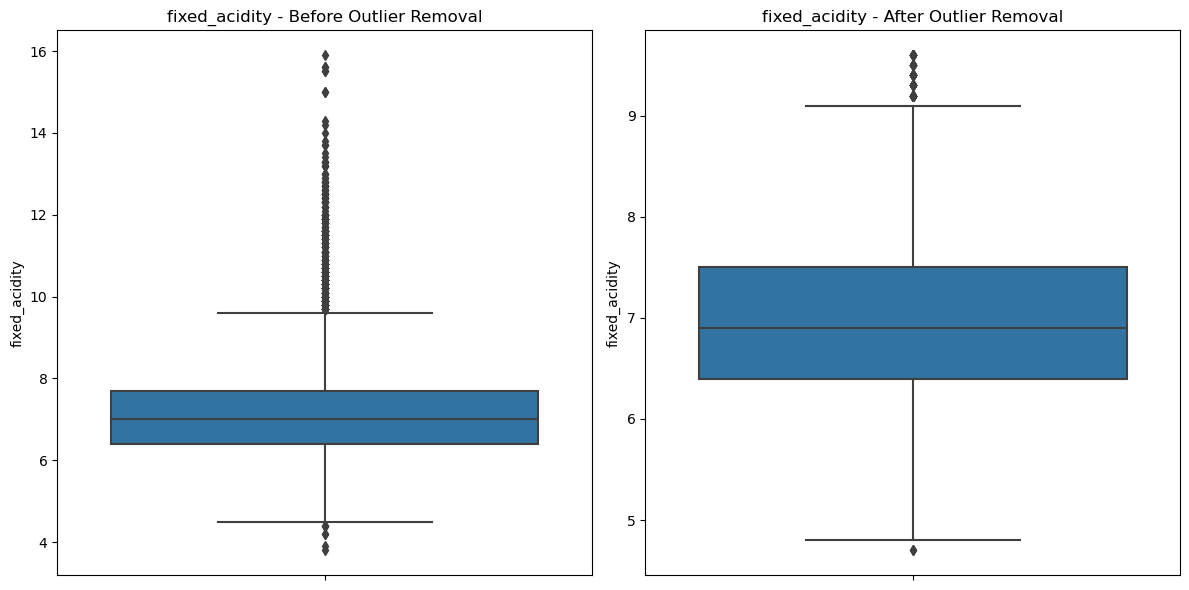

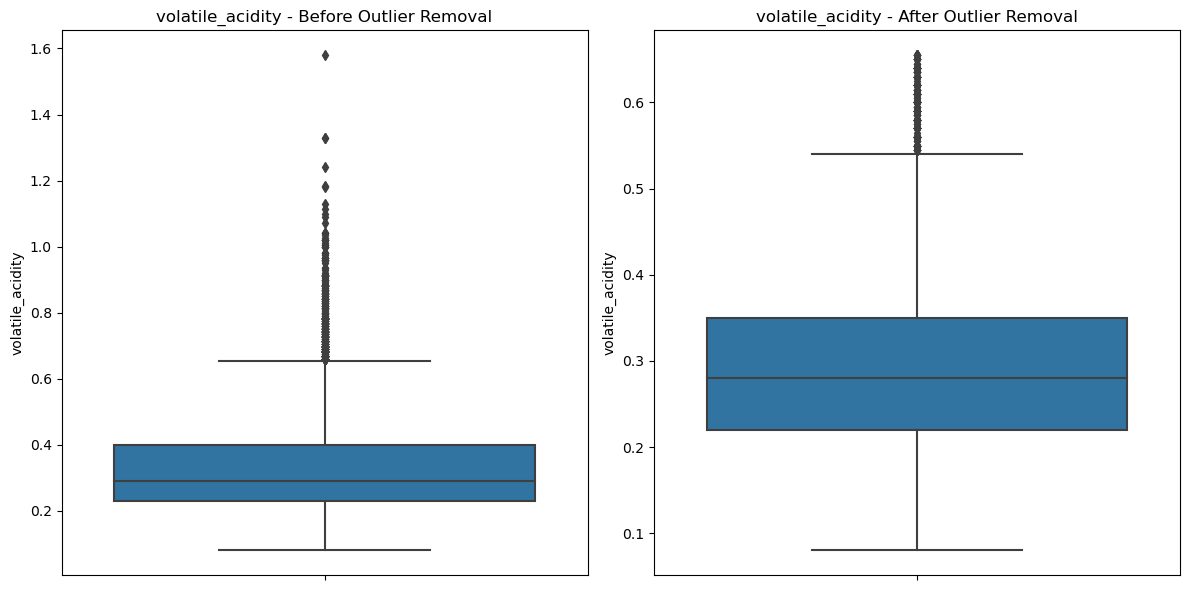

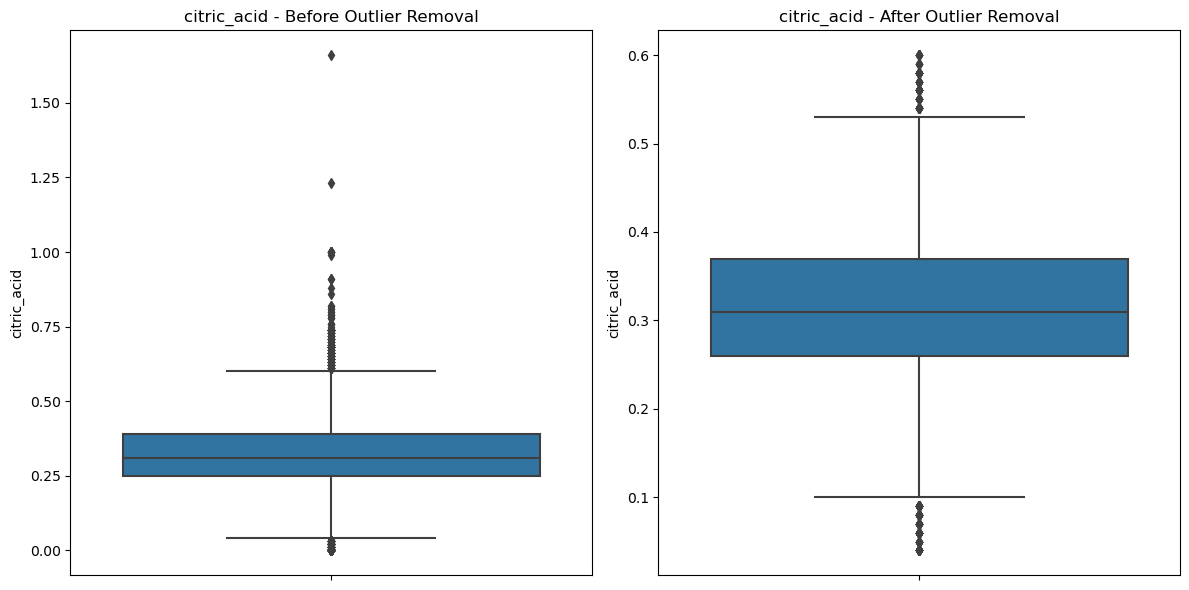

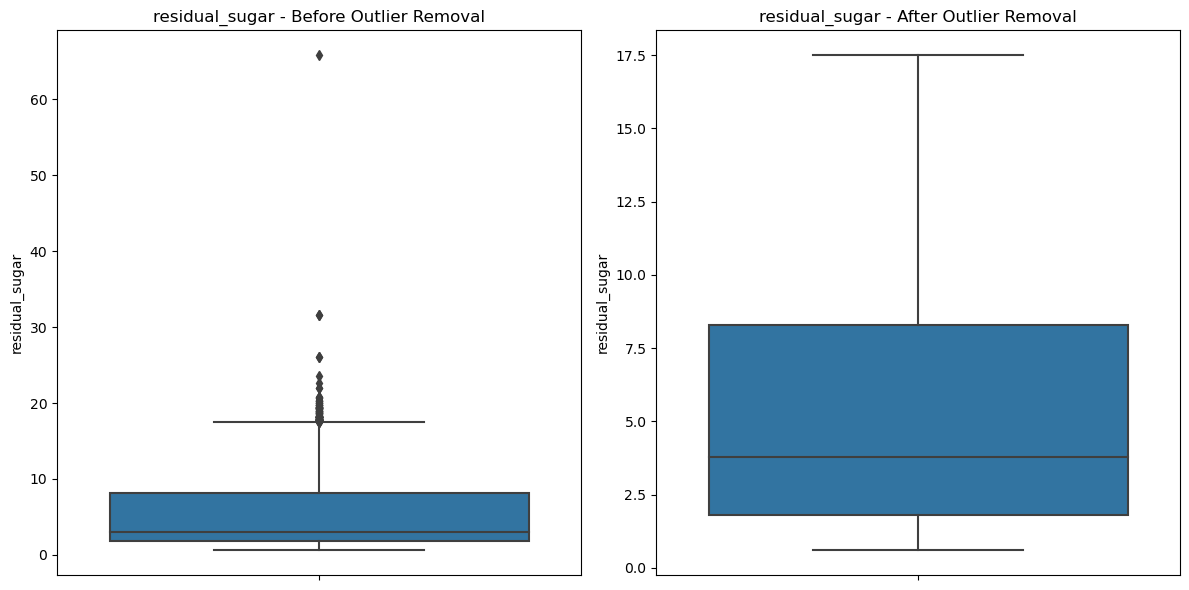

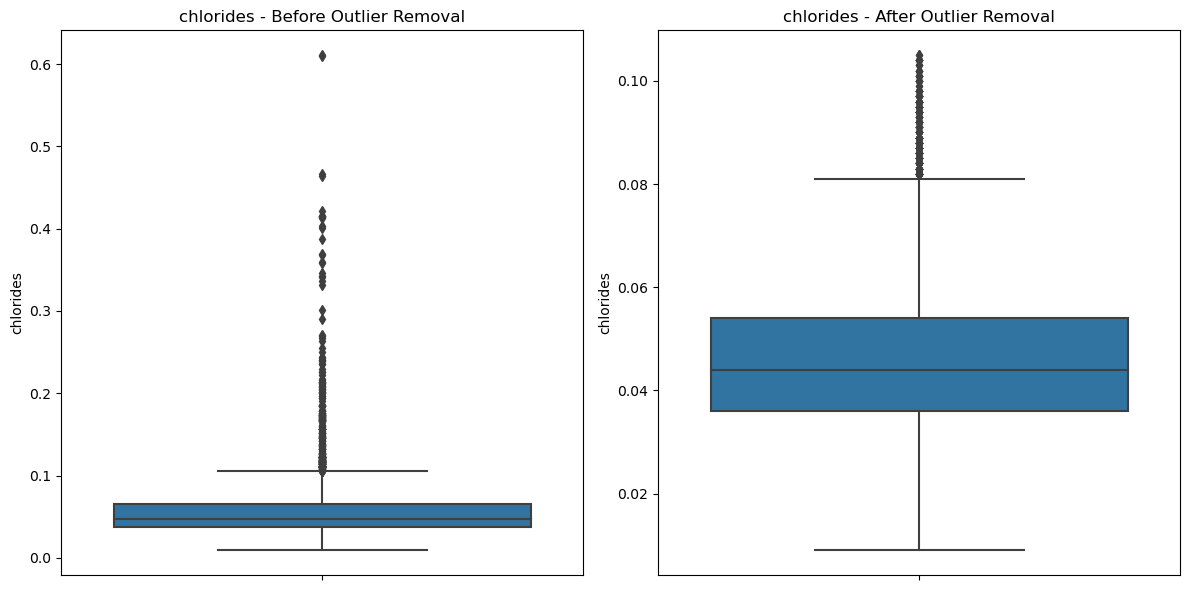

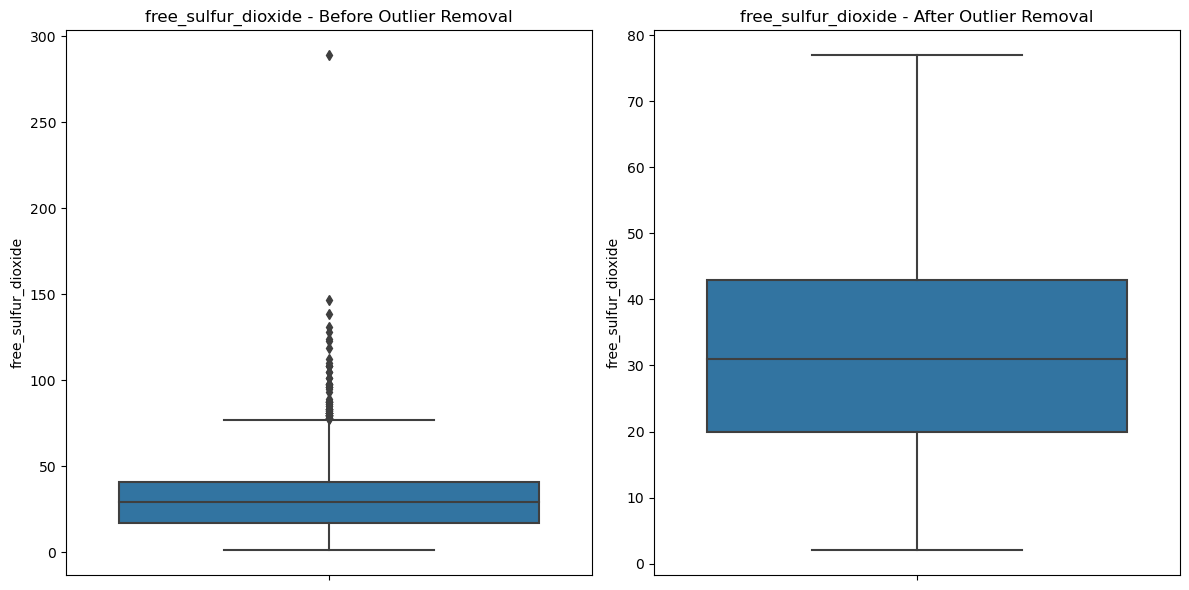

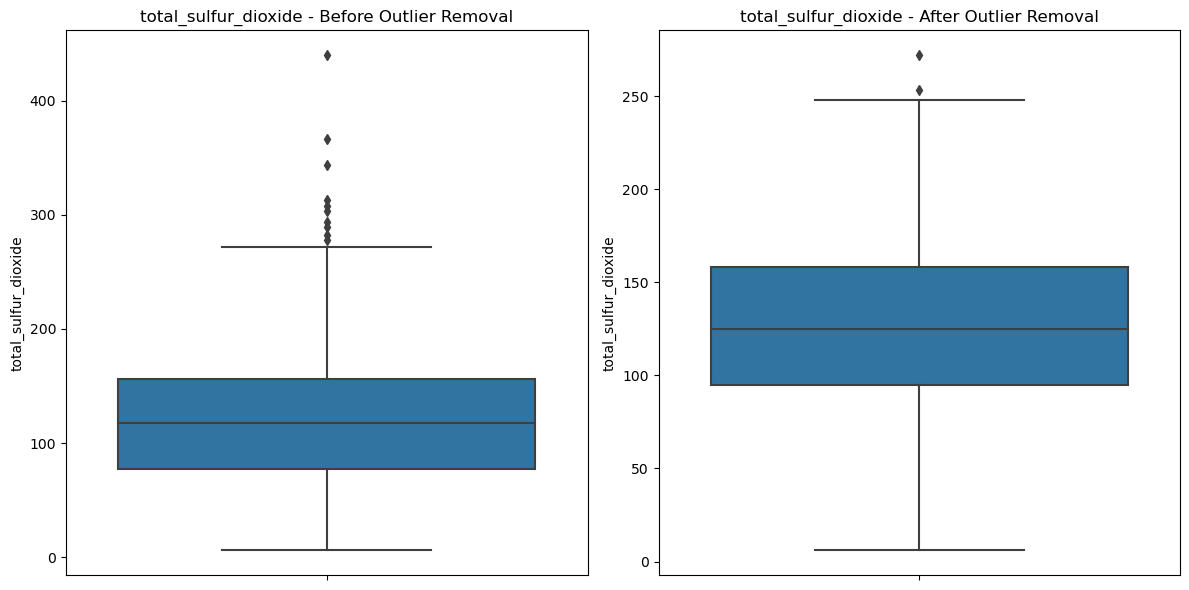

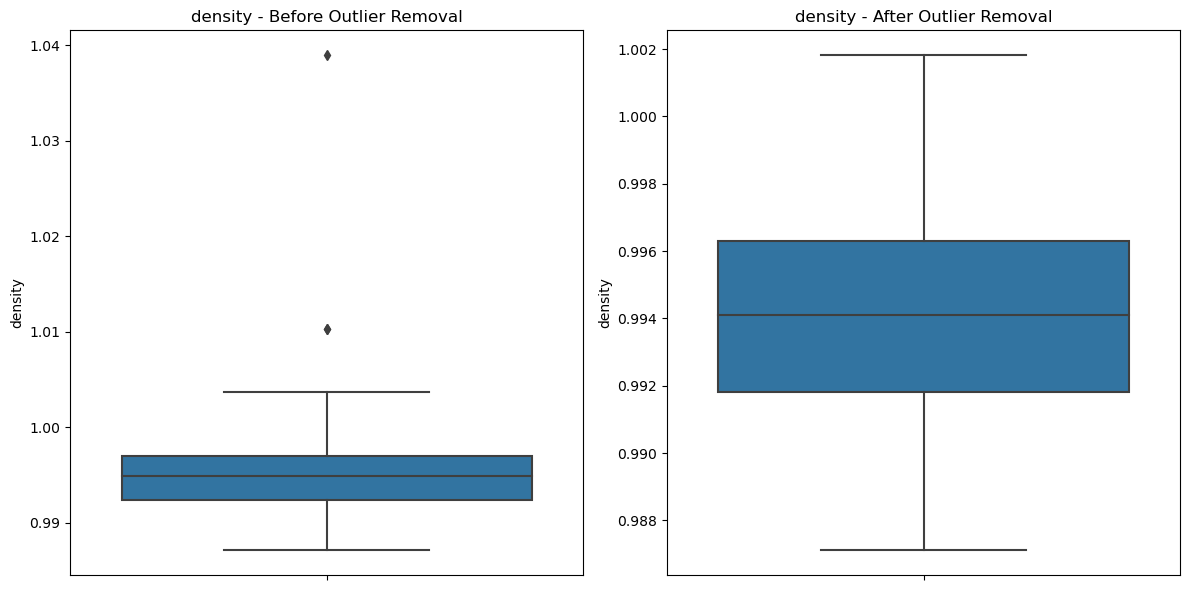

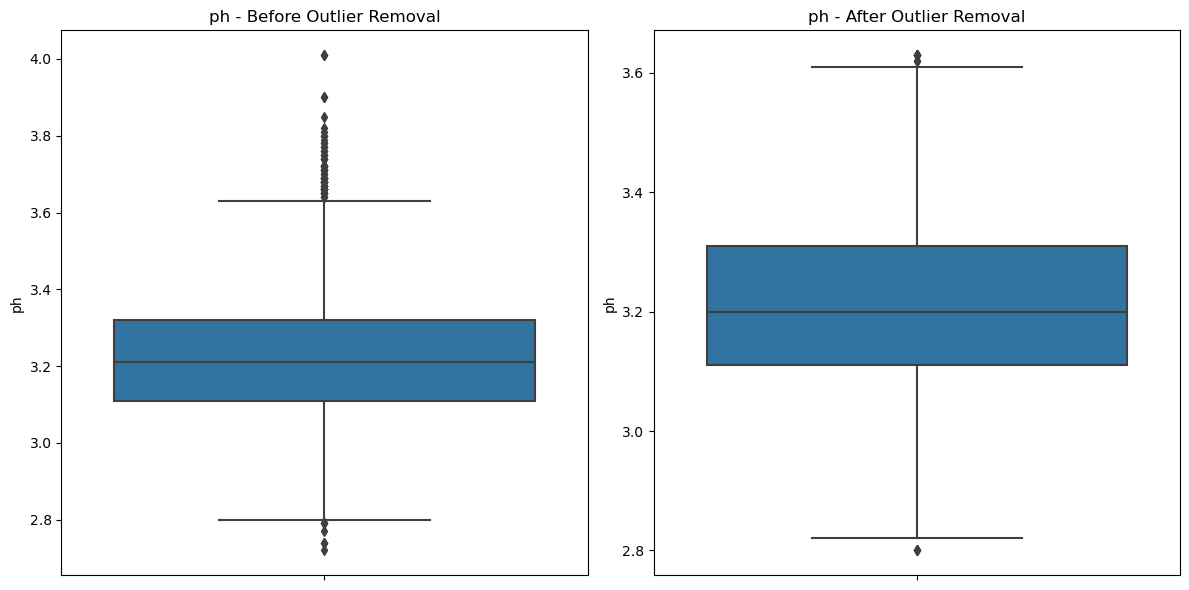

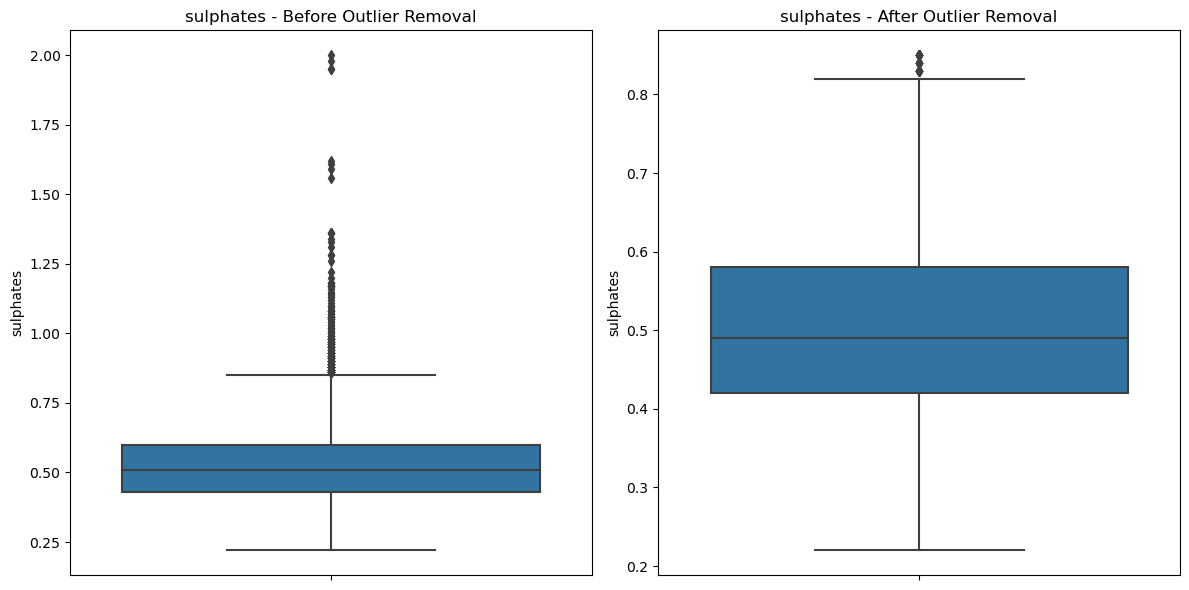

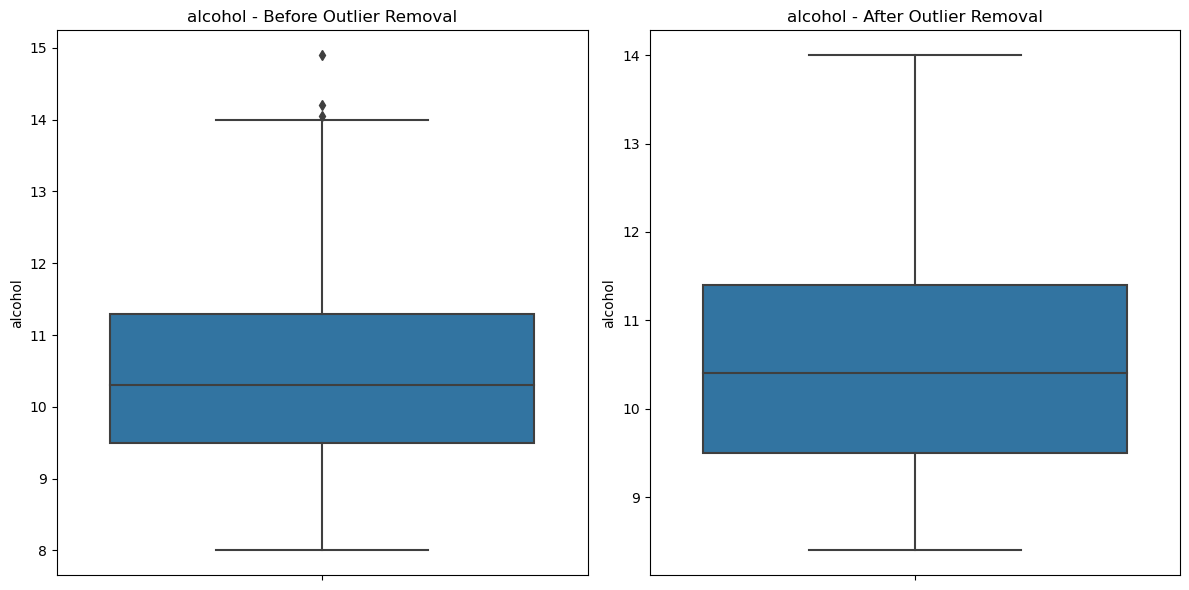

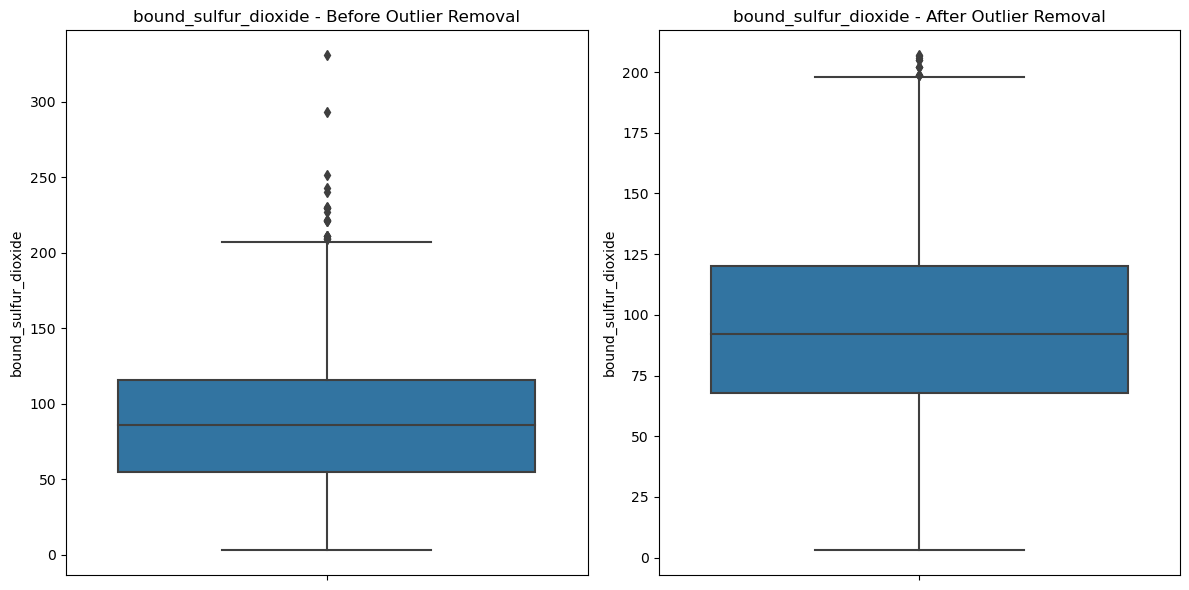

,Column,Upper Bound,Lower Bound,Outliers Removed
0,fixed_acidity,9.650000,4.450000,357
1,volatile_acidity,0.655000,-0.025000,377
2,citric_acid,0.600000,0.040000,509
3,residual_sugar,17.550000,-7.650000,118
4,chlorides,0.105500,-0.002500,286
5,free_sulfur_dioxide,77.000000,-19.000000,62
6,total_sulfur_dioxide,274.500000,-41.500000,10
7,density,1.003965,0.985365,3
8,ph,3.635000,2.795000,73
9,sulphates,0.855000,0.175000,191


In [3]:
# remove outliers
df_clean, summary = w.remove_outliers(df, exclude_columns=['Type', 'quality','White'])
summary

- Before outlier removal
    - White    4898
    - Red      1599
- After outlier removal
    - White    4326
    - Red       688

# Explore
- What are the drivers of wine quality?
- First step is to split into train, validate and test. I will then explore the pairwise relationships and examine the target. 


In [4]:
# rename
df = df_clean

#split into train, validate and test
train, validate, test = p.split_data(df)

# Explore Target

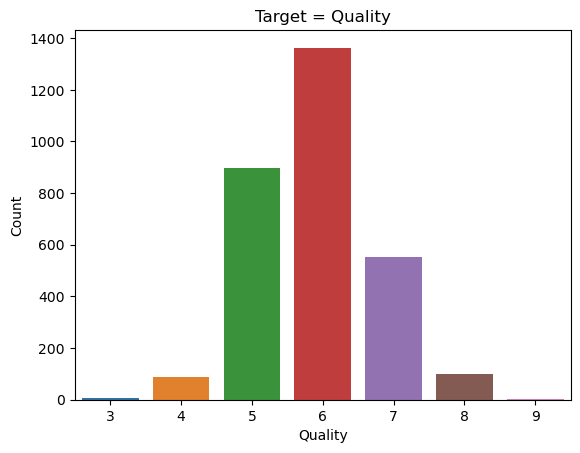

In [5]:
# View Target
muah.plot_target(train)

- The distribution appears normal, and the Shapiro test confirms a normal distribution of the target.

# Set parameters for stats test
- For all stats test alpha is 0.05.
- The Shapiro test for normalcy will be used to confirm normalcy of the data, although there are enough data points to use the Central Limit Theorm.
- A function is used to graph the continuous variable vs. categorical variable through each of the variables.

In [6]:
# set overall mean for ttest that follow
overall_mean = train.quality.mean()

# Is there a relationship between Quality (Categorical) vs. Residual sugar (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and residual sugar

$H_{a}$ : there is a relationship between wine quality and residual sugar

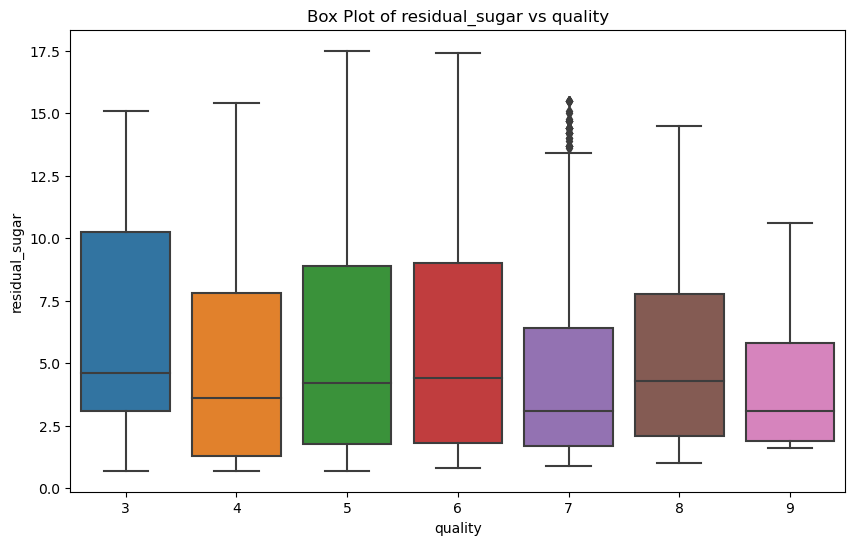

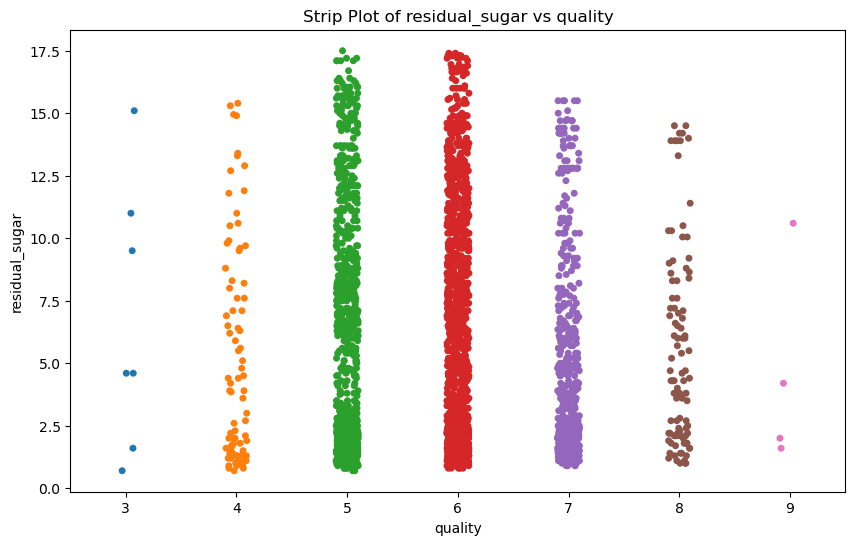

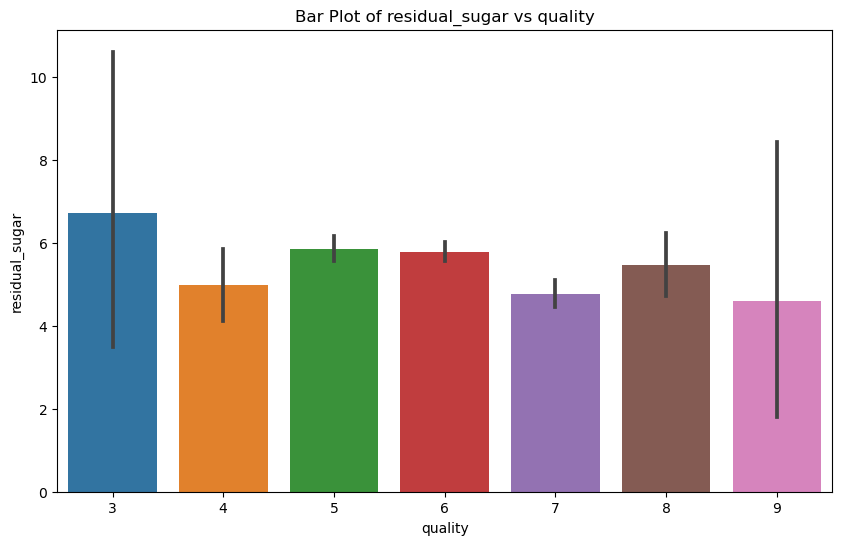

In [7]:
# quality vs. residual_sugar
exp.plot_categorical_and_continuous_vars(train, 'quality', 'residual_sugar')

In [8]:
# stats test
tstat, pval = stats.ttest_1samp(train.residual_sugar, overall_mean)
tstat, pval

(-3.6600109187225467, 0.00025654044261575197)

- Residual sugar is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The plots show residual sugar trends downward as quality increases. 

# Is there a relationship between Quality (Categorical) vs. Bound Sulfur Dioxide (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and bound sulfur dioxide

$H_{a}$ : there is a relationship between wine quality and bound sulfur dioxide

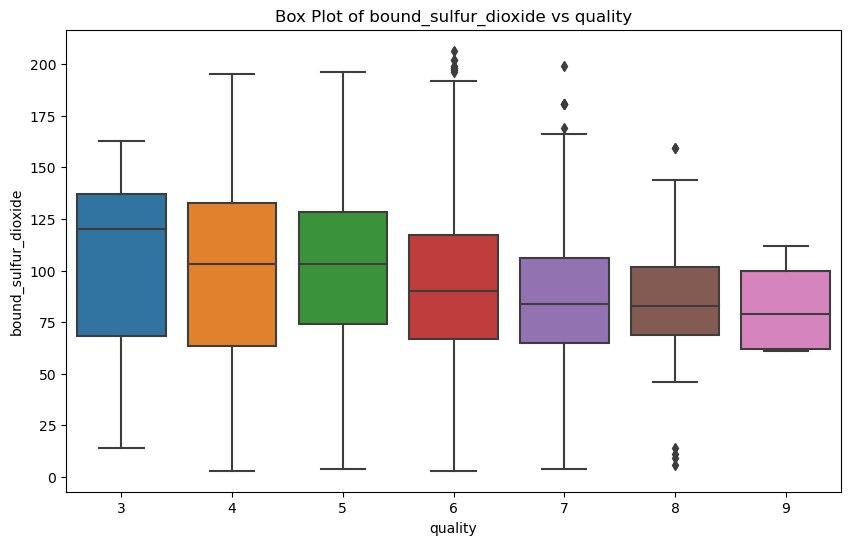

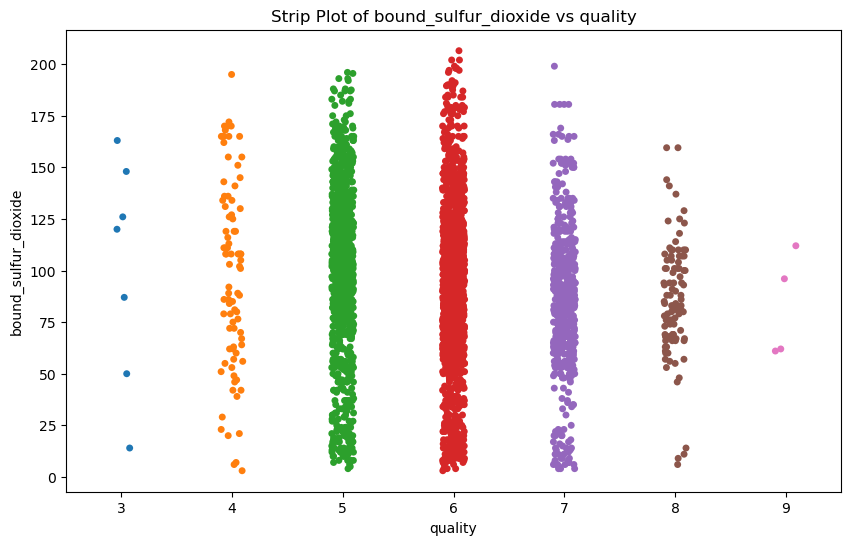

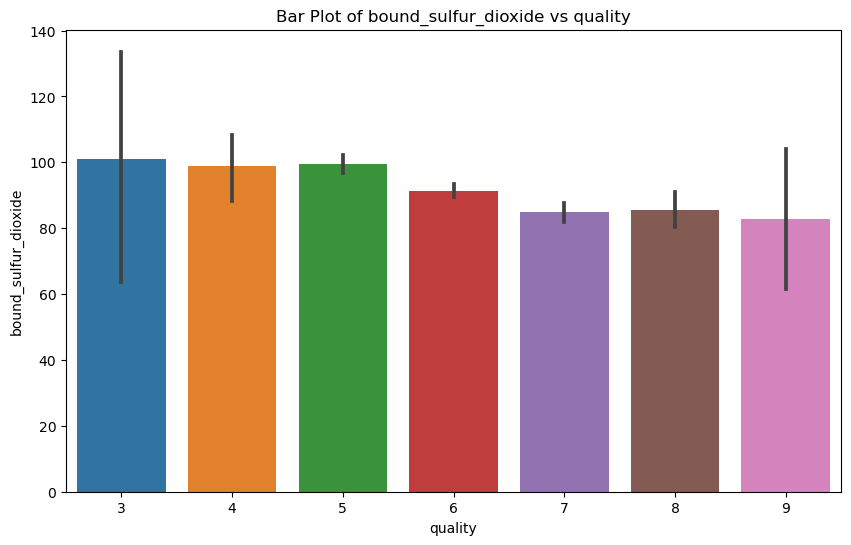

In [9]:
#quality vs. bound_sulfur_dioxide
exp.plot_categorical_and_continuous_vars(train, 'quality', 'bound_sulfur_dioxide')

In [10]:
# stats test
tstat, pval = stats.ttest_1samp(train.bound_sulfur_dioxide, overall_mean)
tstat, pval

(118.08135289728173, 0.0)

- Bound Sulfur Dioxide is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a slight decreasing trend of free_sulfur_dioxide to quality as quality score increases.
- This feature was engineered. The data set provides free and total sulfur dioxide. We created this by figuring out the difference between the two. 

# Is there a relationship between Quality (Categorical) vs. Density (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and density

$H_{a}$ : there is a relationship between wine quality and density

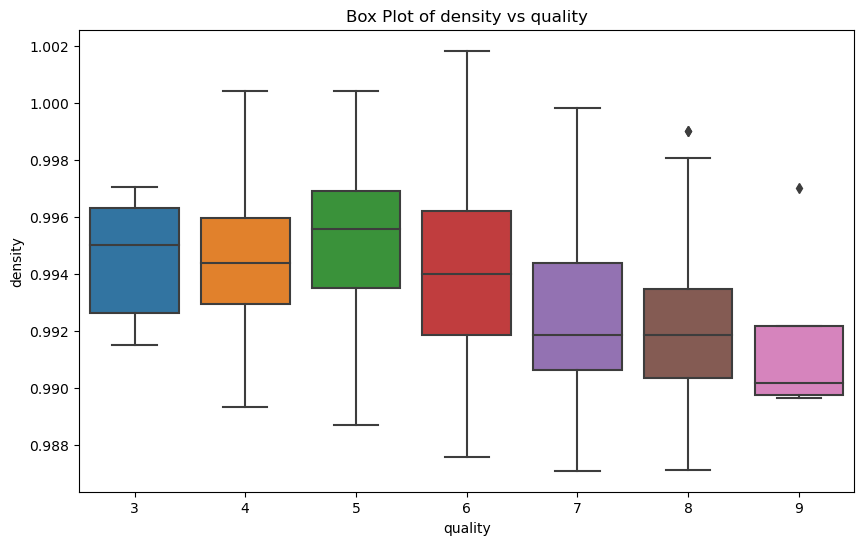

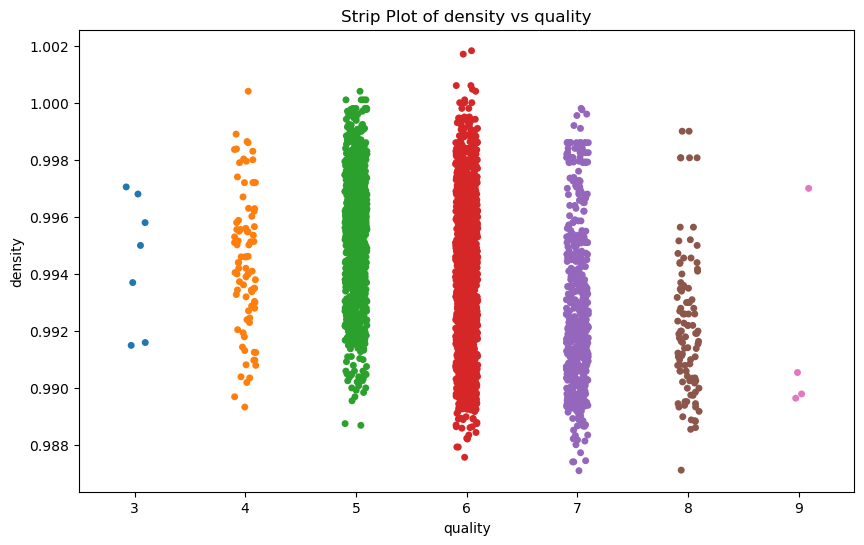

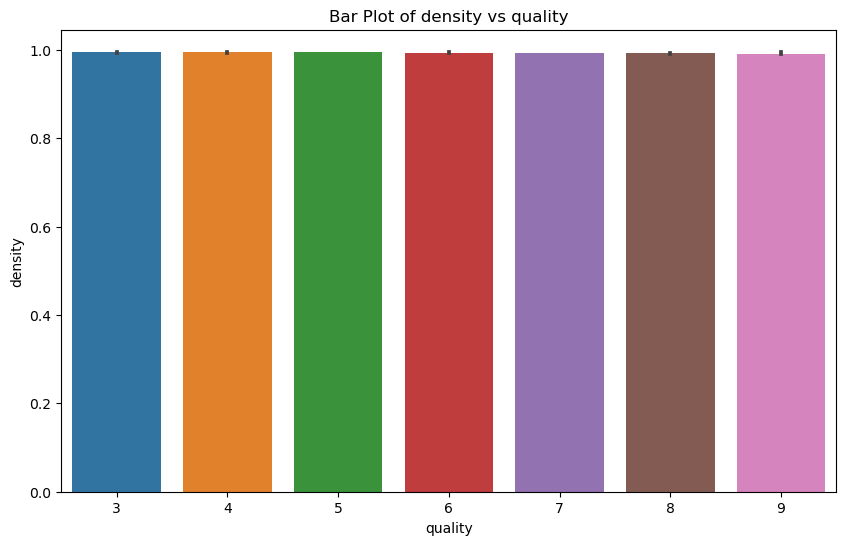

In [11]:
# quality vs. density
exp.plot_categorical_and_continuous_vars(train, 'quality', 'density')

In [12]:
# stats test
tstat, pval = stats.ttest_1samp(train.density, overall_mean)
tstat, pval

(-96582.66305457067, 0.0)

- Density is normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a decreasing trend of density to quality as quality score increases.

# Is there a relationship between Quality (Categorical) vs. Chlorides (Continuous)?

$H_{0}$ : there is not a relationship between wine quality and chlorides

$H_{a}$ : there is a relationship between wine quality and chlorides

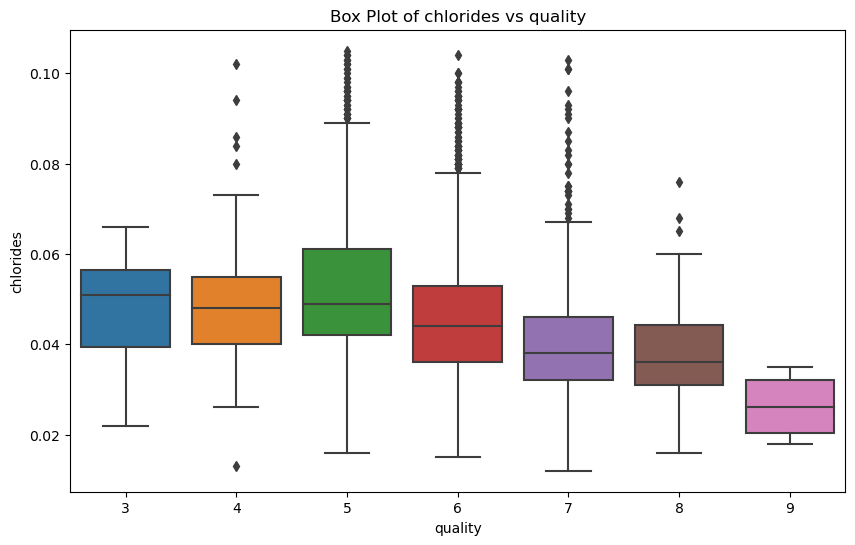

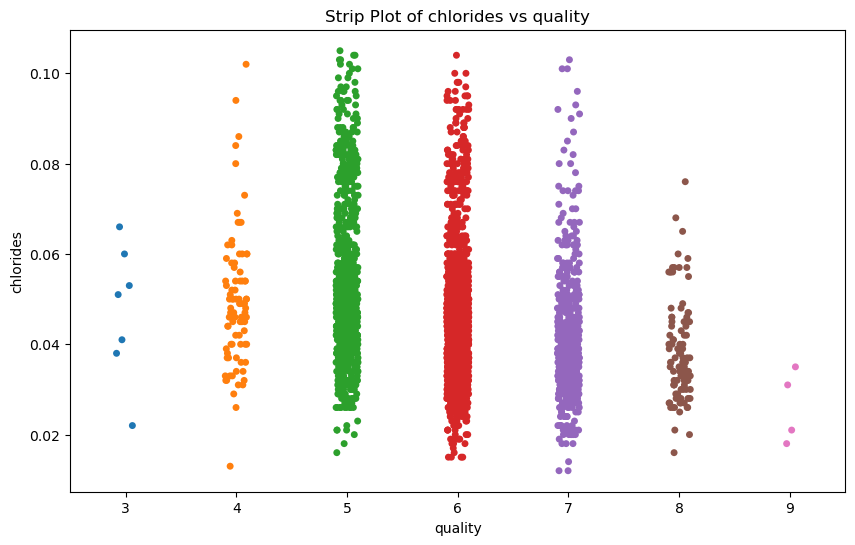

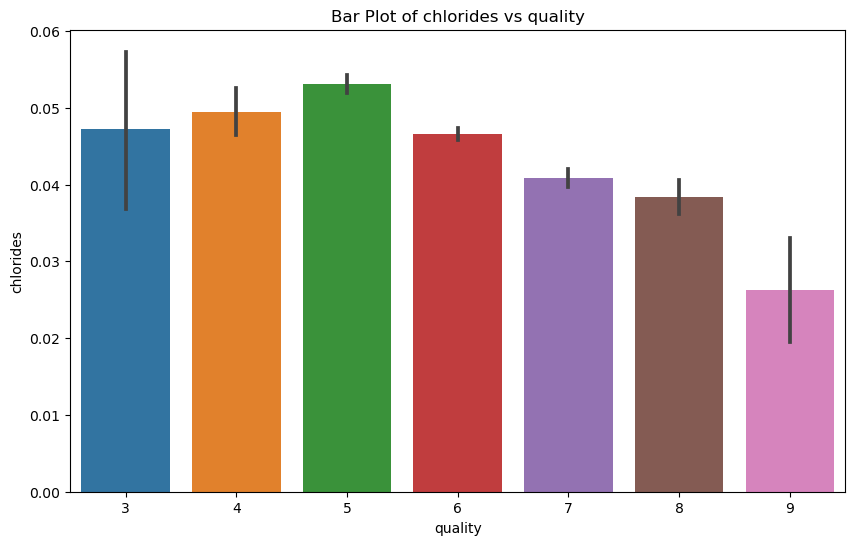

In [13]:
# quality vs. chlorides
exp.plot_categorical_and_continuous_vars(train, 'quality', 'chlorides')

In [14]:
# stats test
tstat, pval = stats.ttest_1samp(train.chlorides, overall_mean)
tstat, pval

(-19714.978714042416, 0.0)

- Chlorides are normally distributed, and based on the ttest pvalue < alpha, we can infer a relationship with quality.
- The various plots show a decreasing trend of chlorides to quality as quality score increases.

# Exploration continued: Clustering
- We attempted to create many clusters
    - Volatile Acidity, Fixed Acidity, Citric Acid as Acids
    - Sulphates, pH, Alcohol
    - Chlorides, Sulphates
    - Fixed Acidity, Bound Sulphur Dioxide
    - Alcohol, Residual Sugar, Density
    
- The Cluster of Alcohol, Residual Sugar, and Density was the only true cluster and was used in modeling.
    - The Clustering process is highlighted below.

In [15]:
# Scale data for clustering 
X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test = p.scaled_df(train, validate, test)

# Elbow for optimal K
- call out specific features for clustering
- print an Elbow graph to aide K selection

In [16]:
# define independent variables for k-means, carry those on to validate and test
X, x1, x2 = muah.variables_for_clustering(X_train_scaled, X_validate_scaled, X_test_scaled)
X.head()

,alcohol,residual_sugar,density
12,0.428571,0.029762,0.332427
4343,0.357143,0.047619,0.355540
2416,0.303571,0.366071,0.619307
4684,0.544643,0.017857,0.262407
6383,0.232143,0.083333,0.608430


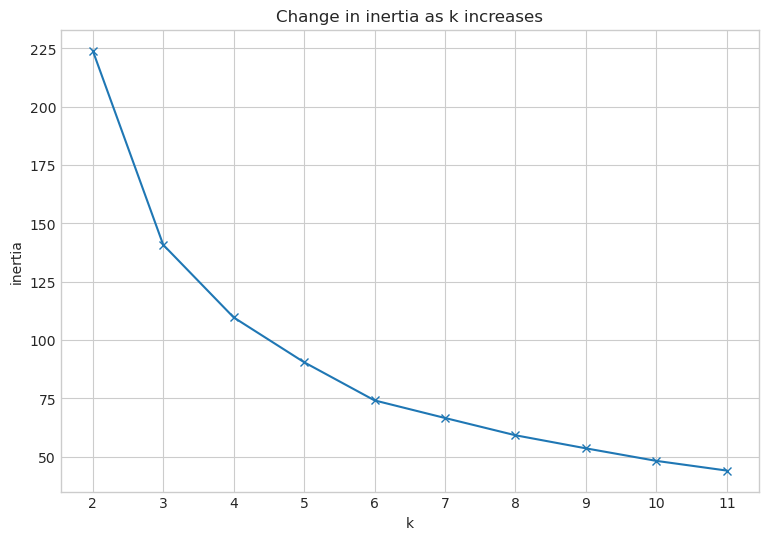

In [17]:
# show Change in inertia graph for k selection
muah.elbow_graph_for_k(X)

# Model Cluster based on k=3
- select features
    - Alcohol
    - Residual Sugar
    - Density
- make the thing, fit the thing, use the thing
- put results into a df
- plot results

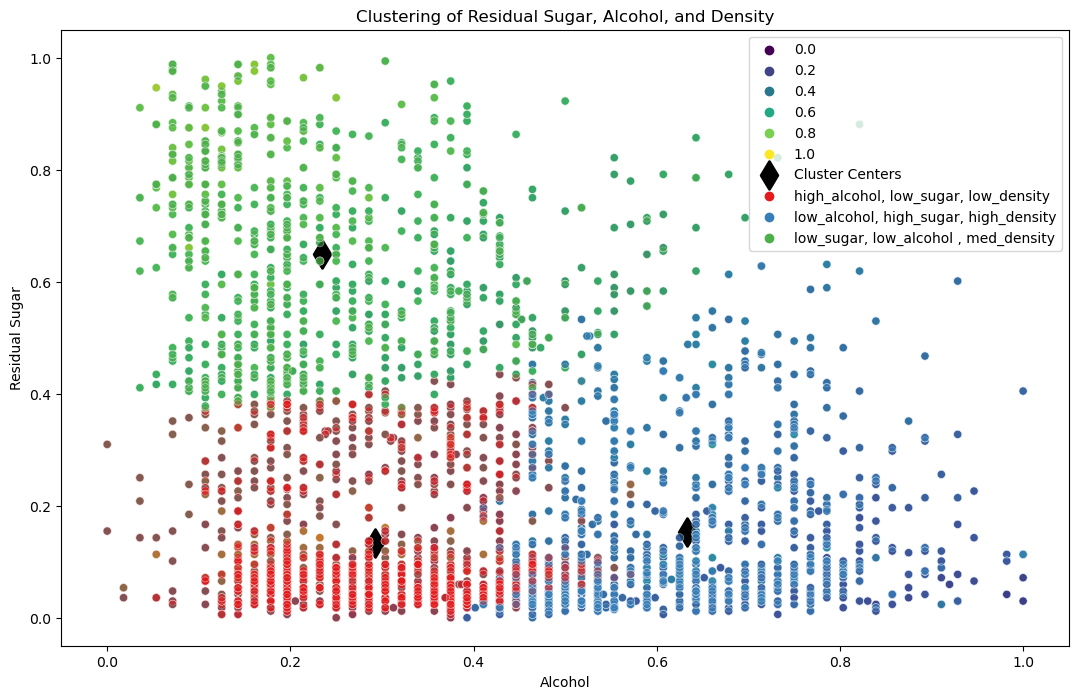

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,bound_sulfur_dioxide,White,sugar_alcohol_density
12,0.653061,0.173913,0.589286,0.029762,0.301075,0.178082,0.285124,0.332427,0.457831,0.650794,0.428571,0.275184,1.0,"high_alcohol, low_sugar, low_density"
4343,0.224490,0.243478,0.375000,0.047619,0.129032,0.246575,0.425620,0.355540,0.686747,0.571429,0.357143,0.417690,1.0,"high_alcohol, low_sugar, low_density"
2416,0.469388,0.139130,0.392857,0.366071,0.376344,0.369863,0.884298,0.619307,0.698795,0.571429,0.303571,0.918919,1.0,"high_alcohol, low_sugar, low_density"
4684,0.265306,0.278261,0.535714,0.017857,0.258065,0.671233,0.735537,0.262407,0.771084,0.349206,0.544643,0.633907,1.0,"low_alcohol, high_sugar, high_density"
6383,0.469388,1.000000,0.214286,0.083333,0.666667,0.068493,0.078512,0.608430,0.686747,0.523810,0.232143,0.068796,0.0,"high_alcohol, low_sugar, low_density"


In [18]:
# Run function to create cluster, 
# Add clustered data to train, validate, test
# Plot results with centroids
X_train_scaled, X_validate_scaled, X_test_scaled = muah.cluster_creation1(X, x1, x2, X_train_scaled, X_validate_scaled, X_test_scaled)
X_train_scaled.head()

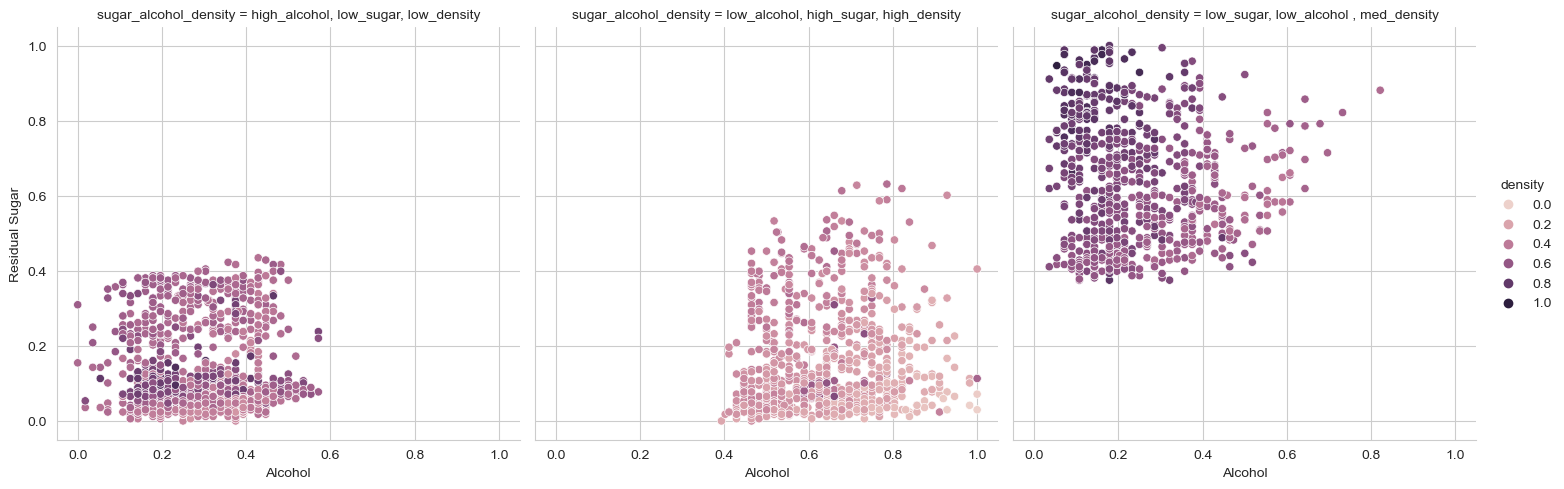

In [19]:
# View individual clusters
muah.individual_cluster_plot(X_train_scaled)

# Compare clusters to quality

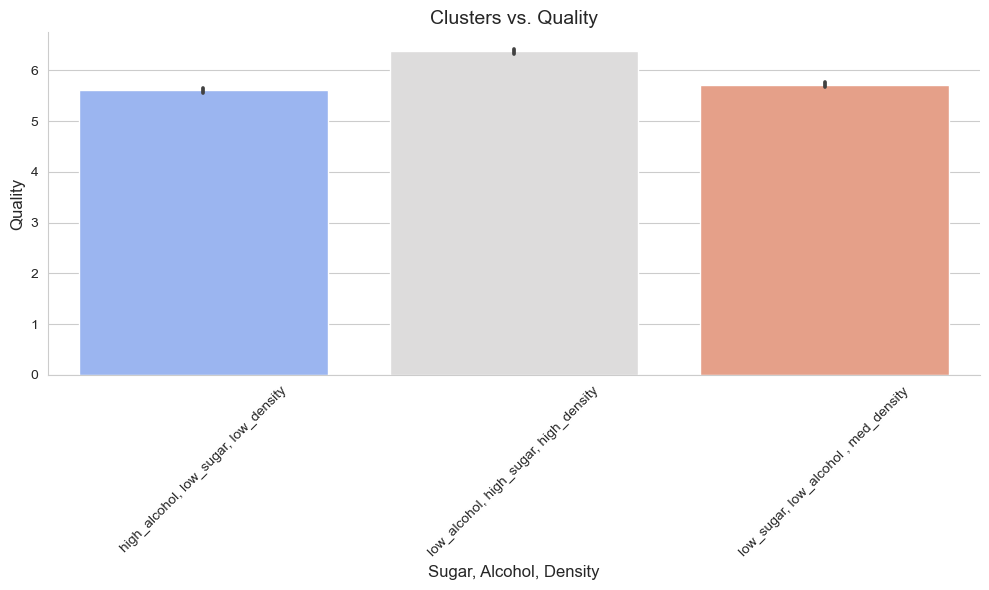

In [20]:
#visualize clusters vs. target
muah.cluster_vs_target(X_train_scaled, y_train)

#### Cluster Model takeaway
- Three clusters were created, they appear to have a relationship with quality.
- The cluster will be used as a feature in modeling.

# Modeling
- Establish baseline
- Run features through modeling
- Classification measured on 'accuracy'
    - Decision tree
    - Random forest
    - KNN
    - Logistic regression
- All four models were ran. The highest performing model (based on comparison between train and validate) is provided below.

# Clean X_train_scaled, etc... for modeling
- remove columns attached to new cluster
- remove columns not being sent into models 

In [21]:
# rename for scaling
X_train_scaled = muah.rename_for_modeling(X_train_scaled)

In [22]:
# select features for modeling, remove features attached to cluster, remove columns not being sent into model
X_train_scaled, X_validate_scaled, X_test_scaled = muah.select_features_for_modeling(X_train_scaled, X_validate_scaled, X_test_scaled)

### Set Baseline Accuracy

In [23]:
# set baseline accuracy
(y_train == 6).mean()

0.453125

# KNN
- will use KNN function to run through train and validate and graph the results

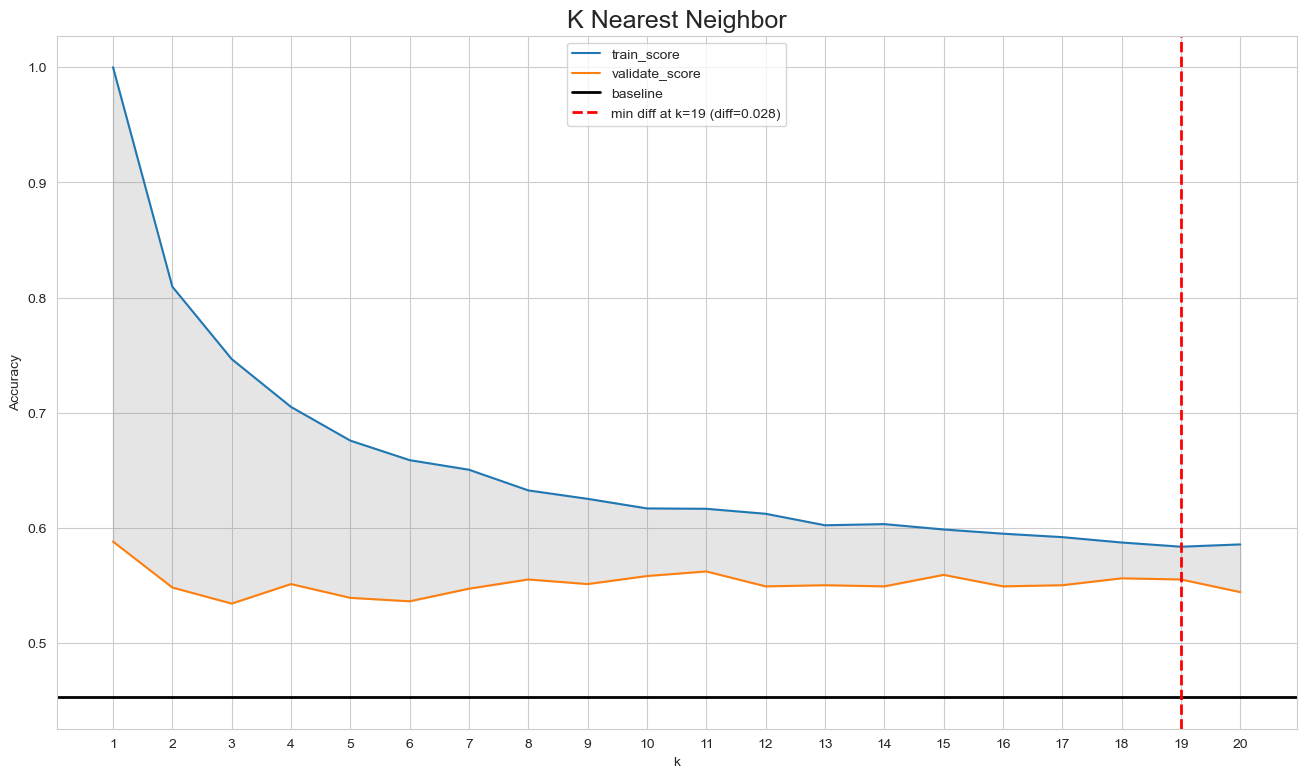

,k,train_score,validate_score,diff_score
18,19,0.583777,0.555334,0.028443


In [24]:
k.k_nearest2(X_train_scaled, y_train, X_validate_scaled, y_validate)[18:19]

- Results of k=19 will be used when running on test data.

# Choose a model
- based on the following summary:

- Baseline accuracy: 0.453

- Decision Tree (max_depth = 4)
    - train: 0.537234	
    - validate: 0.512463
    - difference: 0.024771

- Random Forest (min_samples_leaf = 8, max_depth = 3)
    - train: 0.533		
    - validate: 0.520
    - difference: 0.013

- KNN (k = 19)
    - train: 0.587		
    - validate: 0.561
    - difference: 0.026

- Logistic Regression (C=0.1)
    - train: 0.494		
    - validate: 0.495
    - difference: -0.00083

All models performed better than baseline. Out of the 4 models, the KNN performed the best in both the train and validate iterations. Therefore, I chose KNN as my model of choice for this project. The test data is ran on the model below:

# Run KNN on test data

In [25]:
# Run function to test the test data on KNN model
muah.the_chosen_one(X_train_scaled, X_test_scaled, y_train, y_test)

0.5603190428713859

- The test model scored 56% which is 10 points better than the baseline!!!

# Summary/Conclusion:
- The following data analysis pipeline categories were accomplished (Acquire, Prepare, Explore(with clustering), Model) we found that alcohol, sugar, and density were high drivers of predicting quality.

- We selected the KNN (K nearest neighbors = 19). The decision was made based on highest accuracy score with least amount of difference between train and validate data sets.
- The KNN performed slightly better than baseline (0.453), so we may need to look at other factors that are not available in the dataset like aroma, legs, and taste. 

# Recommendations:
- All of the selected features contributed to the predicting the quality of wine.  
    - Collect more data on red wines. The data set was 1 sided with 75% of the data being white wines. 
        - Diversity in the data would create a better data environment for prediction accuracy. 
        - Higher alcohol and lower sugar seems to drive quality, not by much but a noticeable difference. 

# Next steps:
- With more time, further combination of clusters may create features that create a model with more predictive power.
    - Analyzing the relationships between multiple features in relation to quality could improve the model. 
    - Even though the selected features affect quality, their relationships to other factors may direct where we want to focus efforts in predicting quality.